# Notebook with Modified Data

In [28]:
#Dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [31]:
emp_data=pd.read_csv('Absenteeism_at_work_modified2.csv')

In [33]:
#Seperate into two seperate categories to change the datatype
categorical_set = ["Reason for absence","Month of absence","Disciplinary failure","Social drinker","Social smoker"]

numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Body mass index","Absenteeism time in hours"]

## Converting categorical_set data into category types 
for i in categorical_set :
    emp_data[i] = emp_data[i].astype("category")

for i in numerical_set :
    emp_data[i] = emp_data[i].astype("float64")  

In [34]:
emp_data.shape
emp_data.head()

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Thursday,Friday,2007,2008,2009,2010,Education1,Education2,Education3,Education4
0,11.0,26.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,23.0,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,7.0,7.0,7.0,279.0,5.0,14.0,39.0,239554.0,97.0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,11.0,23.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.0,23.0,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Fit Data in to (X,y)

In [35]:
X = emp_data.drop("Absenteeism time in hours", axis=1)
y = emp_data["Absenteeism time in hours"]
print(X.shape, y.shape)

(696, 29) (696,)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Linear Regression Model 1

In [37]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [38]:
model1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model1.predict(X_test)
y_predicted = np.round_(y_predicted,0)


# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")


Mean Squared Error (MSE): 127.32857142857142
R squared (R2 ): 0.08736887720305497


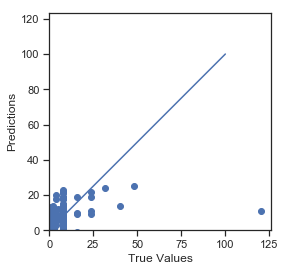

In [39]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Logistic Regression Model 2

In [40]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [41]:
model2.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model2.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 156.85
R-squared (R2 ): -0.12422679375620538


# Decision Tree Model 3

In [42]:
from sklearn import tree
model3=tree.DecisionTreeClassifier()

In [43]:
model3.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model3.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 320.34285714285716
R-squared (R2 ): -1.296066453225479


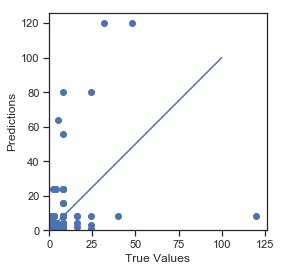

In [44]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Random Forest Model 4 (n_estimators=100)

In [45]:
from sklearn.ensemble import RandomForestClassifier
model4= RandomForestClassifier(n_estimators=200)

In [46]:
model4.fit(X_train, y_train)


# Use our model to predict a value
y_predicted = model4.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 174.97857142857143
R-squared (R2 ): -0.2541638401860633


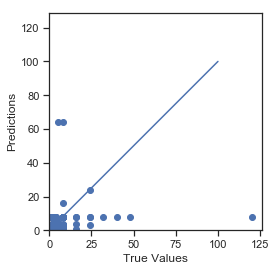

In [47]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])